In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt 
import statsmodels.api as st 
import numpy as np
import plotly.express as px
import warnings 

warnings.simplefilter('ignore')

In [2]:
sales_april=pd.read_csv('./Sales_Data_electronics/Sales_April_2019.csv')
sales_april_ori=sales_april.copy() # for store original data 


In [3]:
#looking columns 
sales_april.head(10)

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   
6   176562        USB-C Charging Cable                1      11.95   
7   176563  Bose SoundSport Headphones                1      99.99   
8   176564        USB-C Charging Cable                1      11.95   
9   176565          Macbook Pro Laptop                1       1700   

       Order Date                        Purchase Address  
0  04/19/19 08:46            917 1st St, Dallas, TX 75001  
1             NaN                                     NaN  
2  04/07/19 22:30       682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38    669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38    669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27       333 8th St, Los Angeles, CA 90001  
6  04/29/19 13:03  381 Wilson St, San Francisco, CA 94016  
7  04/02/19 07:46        668 Center St, Seattle, WA 98101  
8  04/12/19 10:58         790 Ridge St, Atlanta, GA 30301  
9  04/24/19 10:38  915 Willow St, San Francisco, CA 94016

In [4]:
#shape
sales_april.shape

(18383, 6)

In [5]:
#info data  
sales_april.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


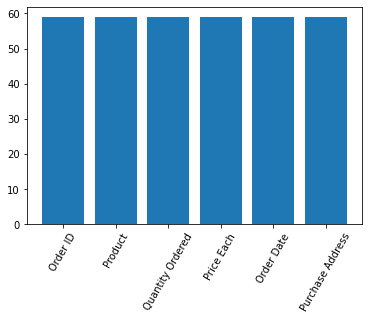

In [6]:
# visuliazation of null data
name_column=[]
sum_null=[]
for i in sales_april.columns:
    x=(sum(sales_april['Order ID'].isnull()))
    name_column.append(i)
    sum_null.append(x)
plt.bar(name_column,sum_null)
plt.xticks(rotation=60)
plt.show()

In [7]:
# if we drop nan value than we loss information 
null_value_sum=sales_april.isnull().sum()

In [8]:
(sum(null_value_sum)/sales_april.size)*100 

0.32094870260566827

**we loss 32 % of data after the droping  the null values it's neglible**

In [9]:
sales_april=sales_april.dropna()

In [10]:
#left data
sales_april.shape

(18324, 6)

In [11]:
sales_april.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

<b> <h2> Cleaning data </h2> </b>

In [12]:
# cleaning column and seperate appropriate colums
i=sales_april[sales_april['Quantity Ordered']=='Quantity Ordered'].index 
# here we look sales_april['Quantity Ordered'].unique() we find  'Quantity Ordered' so it's noise (order id etc in row)
sales_april.drop(i,axis=0,inplace=True) 

In [13]:
#convert to object to int or float respectivly columns 
sales_april['Quantity Ordered']=sales_april['Quantity Ordered'].astype(int) 
sales_april['Price Each']=sales_april['Price Each'].astype(float) 

In [14]:
# seperate columns time or date from orderdate
sales_april['Order Date']=sales_april['Order Date'].str.split(' ')

In [15]:
sales_april['ord_date']=sales_april['Order Date'].apply(lambda x : x[0])
sales_april['ord_time']=sales_april['Order Date'].apply(lambda x : x[1])

In [16]:
sales_april['ord_date_day']=sales_april['ord_date'].str.split('/').apply(lambda x:int(x[1]))
sales_april['ord_date_month']=sales_april['ord_date'].str.split('/').apply(lambda x:int(x[0]))

In [17]:
sales_april['ord_time']=sales_april['ord_time'].str.split(':').apply(lambda x :round(float(x[0])+float(x[1])/60,2))


In [18]:
sales_april.head(10)
#note we are not making year columns because all the data in
# year same but month diffrent (it's april but outside sales data have diffrent month)

Order ID                     Product  Quantity Ordered  Price Each  \
0    176558        USB-C Charging Cable                 2       11.95   
2    176559  Bose SoundSport Headphones                 1       99.99   
3    176560                Google Phone                 1      600.00   
4    176560            Wired Headphones                 1       11.99   
5    176561            Wired Headphones                 1       11.99   
6    176562        USB-C Charging Cable                 1       11.95   
7    176563  Bose SoundSport Headphones                 1       99.99   
8    176564        USB-C Charging Cable                 1       11.95   
9    176565          Macbook Pro Laptop                 1     1700.00   
10   176566            Wired Headphones                 1       11.99   

           Order Date                        Purchase Address  ord_date  \
0   [04/19/19, 08:46]            917 1st St, Dallas, TX 75001  04/19/19   
2   [04/07/19, 22:30]       682 Chestnut St, Boston, MA 02215  04/07/19   
3   [04/12/19, 14:38]    669 Spruce St, Los Angeles, CA 90001  04/12/19   
4   [04/12/19, 14:38]    669 Spruce St, Los Angeles, CA 90001  04/12/19   
5   [04/30/19, 09:27]       333 8th St, Los Angeles, CA 90001  04/30/19   
6   [04/29/19, 13:03]  381 Wilson St, San Francisco, CA 94016  04/29/19   
7   [04/02/19, 07:46]        668 Center St, Seattle, WA 98101  04/02/19   
8   [04/12/19, 10:58]         790 Ridge St, Atlanta, GA 30301  04/12/19   
9   [04/24/19, 10:38]  915 Willow St, San Francisco, CA 94016  04/24/19   
10  [04/08/19, 14:05]             83 7th St, Boston, MA 02215  04/08/19   

    ord_time  ord_date_day  ord_date_month  
0       8.77            19               4  
2      22.50             7               4  
3      14.63            12               4  
4      14.63            12               4  
5       9.45            30               4  
6      13.05            29               4  
7       7.77             2               4  
8      10.97            12               4  
9      10.63            24               4  
10     14.08             8               4

In [19]:
# now we seperate address columns
sales_april['Purchase Address']=sales_april['Purchase Address'].str.split(',')

In [20]:
sales_april['area_in_city']=sales_april['Purchase Address'].apply(lambda x :x[0])
sales_april['city']=sales_april['Purchase Address'].apply(lambda x: x[1])
sales_april['state_zip']=sales_april['Purchase Address'].apply(lambda x :x[2])

<u><b><h2>Now we build the cleaning data pipeline(function )</h2></b>  </u>

In [21]:
def cleaning_data(df):
    
    df=df.dropna()
    # cleaning column and seperate appropriate colums
    i = df[df['Quantity Ordered'] == 'Quantity Ordered'].index
    # here we look df['Quantity Ordered'].unique() we find  'Quantity Ordered' so it's noise (order id etc in row)
    df.drop(i, axis=0, inplace=True)
    
    #convert to object to int or float respectivly columns 
    df['Quantity Ordered']=df['Quantity Ordered'].astype(int) 
    df['Price Each']=df['Price Each'].astype(float) 
    
    # seperate columns time or date from orderdate
    df['Order Date']=df['Order Date'].str.split(' ')
    df['ord_date']=df['Order Date'].apply(lambda x : x[0]) # date 
    df['ord_time']=df['Order Date'].apply(lambda x : x[1]) # time
    df['ord_date_day']=df['ord_date'].str.split('/').apply(lambda x:int(x[1]))  #day
    
    df['ord_date_month']=df['ord_date'].str.split('/').apply(lambda x:int(x[0])) # month
    
    #time convert minute to hour 
    df['ord_time']=df['ord_time'].str.split(':').apply(lambda x :round(float(x[0])+float(x[1])/60,2))
    # now we seperate address columns
    df['Purchase Address']=df['Purchase Address'].str.split(',')
    df['area_in_city']=df['Purchase Address'].apply(lambda x :x[0]) # area and street
    df['city']=df['Purchase Address'].apply(lambda x: x[1])  #city
    df['state_zip']=df['Purchase Address'].apply(lambda x :x[2]) # stae_zip
    
    return df

In [22]:
sales_april_clean=cleaning_data(sales_april_ori) # our data is clean 

In [23]:
sales_april_clean.head(10)

Order ID                     Product  Quantity Ordered  Price Each  \
0    176558        USB-C Charging Cable                 2       11.95   
2    176559  Bose SoundSport Headphones                 1       99.99   
3    176560                Google Phone                 1      600.00   
4    176560            Wired Headphones                 1       11.99   
5    176561            Wired Headphones                 1       11.99   
6    176562        USB-C Charging Cable                 1       11.95   
7    176563  Bose SoundSport Headphones                 1       99.99   
8    176564        USB-C Charging Cable                 1       11.95   
9    176565          Macbook Pro Laptop                 1     1700.00   
10   176566            Wired Headphones                 1       11.99   

           Order Date                            Purchase Address  ord_date  \
0   [04/19/19, 08:46]            [917 1st St,  Dallas,  TX 75001]  04/19/19   
2   [04/07/19, 22:30]       [682 Chestnut St,  Boston,  MA 02215]  04/07/19   
3   [04/12/19, 14:38]    [669 Spruce St,  Los Angeles,  CA 90001]  04/12/19   
4   [04/12/19, 14:38]    [669 Spruce St,  Los Angeles,  CA 90001]  04/12/19   
5   [04/30/19, 09:27]       [333 8th St,  Los Angeles,  CA 90001]  04/30/19   
6   [04/29/19, 13:03]  [381 Wilson St,  San Francisco,  CA 94016]  04/29/19   
7   [04/02/19, 07:46]        [668 Center St,  Seattle,  WA 98101]  04/02/19   
8   [04/12/19, 10:58]         [790 Ridge St,  Atlanta,  GA 30301]  04/12/19   
9   [04/24/19, 10:38]  [915 Willow St,  San Francisco,  CA 94016]  04/24/19   
10  [04/08/19, 14:05]             [83 7th St,  Boston,  MA 02215]  04/08/19   

    ord_time  ord_date_day  ord_date_month     area_in_city            city  \
0       8.77            19               4       917 1st St          Dallas   
2      22.50             7               4  682 Chestnut St          Boston   
3      14.63            12               4    669 Spruce St     Los Angeles   
4      14.63            12               4    669 Spruce St     Los Angeles   
5       9.45            30               4       333 8th St     Los Angeles   
6      13.05            29               4    381 Wilson St   San Francisco   
7       7.77             2               4    668 Center St         Seattle   
8      10.97            12               4     790 Ridge St         Atlanta   
9      10.63            24               4    915 Willow St   San Francisco   
10     14.08             8               4        83 7th St          Boston   

    state_zip  
0    TX 75001  
2    MA 02215  
3    CA 90001  
4    CA 90001  
5    CA 90001  
6    CA 94016  
7    WA 98101  
8    GA 30301  
9    CA 94016  
10   MA 02215

## Now we are starting EDA analysis 



### Before we perform any analysis on this data we need to ask question to this dataset

- which product is maximum  sold  by shop ?
- which product is minimum  sold  by shop ?
- which day shop got maximum order ?
- which day shop got minimum order ?
- which time shop got maximum order(24 hours ) ?
- which time shop got minimum order(24 hours ) ?
- which state(zip) bought  maximum e-devices from this shop ?
- which city bought maximum e-devices from this shop ?
- which things price is maximum with which day those  sold maximum ?
- which things price is maximum with which state  those  sold maximum ?
- which things price is maximum   city those  sold maximum ?
- time vs Price Each density plot what's pattern?
- time vs Quantity sold  histogram ?

- which product is maximum  sold  by shop ?
- which product is minimum  sold  by shop ?

In [24]:
df=sales_april_clean.groupby(['Product'],as_index=False).agg({'Quantity Ordered':sum})
df=df.sort_values(by='Quantity Ordered',ascending=False)
df.reset_index(0,inplace=True,drop=True)
df

Product  Quantity Ordered
0       AAA Batteries (4-pack)              2936
1        AA Batteries (4-pack)              2822
2     Lightning Charging Cable              2371
3         USB-C Charging Cable              2270
4             Wired Headphones              2066
5     Apple Airpods Headphones              1525
6   Bose SoundSport Headphones              1288
7             27in FHD Monitor               737
8                       iPhone               695
9       34in Ultrawide Monitor               653
10                Google Phone               581
11      27in 4K Gaming Monitor               565
12               Flatscreen TV               459
13          Macbook Pro Laptop               455
14                20in Monitor               395
15             ThinkPad Laptop               392
16             Vareebadd Phone               220
17                    LG Dryer                77
18          LG Washing Machine                61

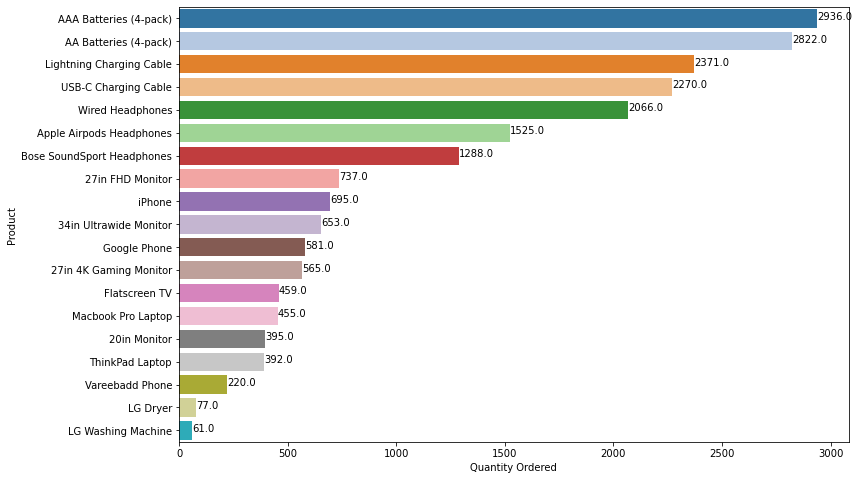

In [26]:
# sns.set_style("ticks")

# plt.rcParams["figure.figsize"] = (10,5)
plt.figure(figsize=(12,8))

ax=sns.barplot('Quantity Ordered','Product',data=df,palette= 'tab20')
for p in ax.patches:
    point= p.xy
    ax.text(p.get_width(),point[1]+0.45,p.get_width())

    




**Conclusion :**= AAA Batteries (4-pack) ,AA  Batteries (4-pack) maximum sold  

<p style="color:black"> Reason: This battery size is most often used in small devices such as laser pointers, 
LED penlights, powered computer styluses, glucose meters,and small headphone amplifiers and LG Washing Machine less sold because Manufacturer Warranty: 2 years on product and 10 years on motoranother things here is here Usb cable highly use that's means here  people use  maximum mobile phone and laptop uses for jobs and social media. <p>

<p style="color:black"> wiredheadphone 2066 quantity it's indicate here people likes  introvert behaviour 
and near future  people is  suffer from anxity and depression and 
ear disease so you can build near the ear hospital <p>



- which day shop got maximum order ?
- which day shop got minimum order ?

In [25]:


df=sales_april_clean.groupby(['ord_date_day'],as_index=False).agg({'Quantity Ordered':sum})
df=df.sort_values(by='Quantity Ordered')
df.reset_index(0,inplace=True,drop=True)
df['ord_date_day']=df['ord_date_day'].astype(str) 
df

ord_date_day  Quantity Ordered
0            19               627
1            15               635
2            22               641
3             7               641
4            25               654
5            26               659
6            20               663
7             2               663
8            23               670
9            28               673
10            8               674
11           29               674
12            5               675
13           16               681
14            3               685
15            9               689
16            6               695
17           12               696
18           27               698
19           30               698
20           10               699
21           14               702
22           24               702
23           11               702
24            1               702
25            4               710
26           13               729
27           17               733
28           18               737
29           21               761

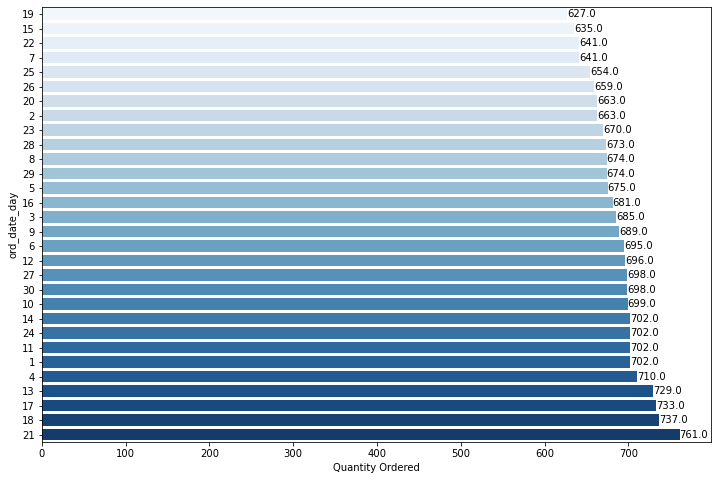

In [26]:
plt.figure(figsize=(12,8))

ax=sns.barplot('Quantity Ordered','ord_date_day',data=df,palette= 'Blues',orient='h')
for p in ax.patches:
    point= p.xy
    ax.text(p.get_width(),point[1]+0.6,p.get_width())
#     print(p.get_width(),point[1])



**Conclusion** : The following is a compilation of American federal holidays, federal observances, state holidays and other 
common patriotic and national observances and commemorations that apply to the United States during Sunday, 2019-04-21.

<p> <b> Easter Sunday</b> :
Easter falls on a spring Sunday that varies from year to year. 
Easter is recognized as a flag day but has not been a federal holiday due to falling always on a Sunday,
which is a non-working day for federal and state employees. However, many companies, including banks, malls,
shopping centers and most private retail stores that normally open on Sundays are closed on Easter. 
Easter is a Christian holiday celebrating the resurrection of Jesus Christ. For Christians, Easter is a day of religious services and the gathering of family. Many Americans follow old traditions of coloring hard-boiled eggs and giving children baskets of candy.
Note: april 19 is normal day may be sad day i don't know  <p>

- which time shop got maximum order(24 hours ) ?
- which time shop got minimum order(24 hours ) ?

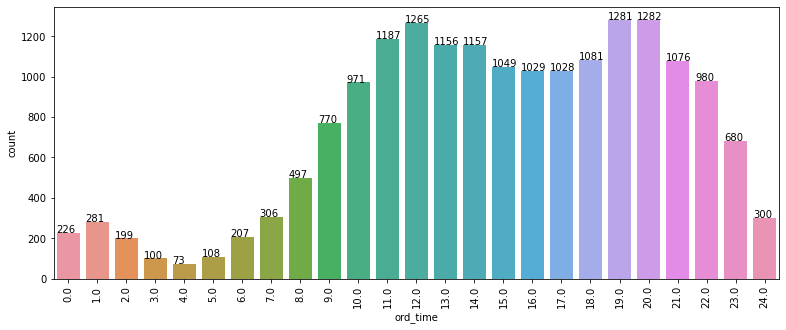

In [27]:
plt.figure(figsize=(13,5))
df=sales_april_clean
l1=round(df['ord_time'],0)
axes=sns.countplot(x=l1,orient='h')
plt.xticks(rotation=90)
for p in axes.patches:
        point=p.xy
        
        height = p.get_height()
        width=p.get_width()
        n=axes.text(width+point[0]-(width/2+0.4),height+1.2,height)
#         axes.text(height,)
plt.show()

- which state(zip) bought  maximum e-devices from this shop?

In [28]:

df=sales_april_clean
df=df.groupby(['state_zip'],as_index=False).agg({'Quantity Ordered':sum})
df=df.sort_values(by='Quantity Ordered')
df.head(30)

state_zip  Quantity Ordered
4   ME 04101               265
7   TX 73301              1092
6   OR 97035              1134
8   TX 75001              1519
9   WA 98101              1608
2   GA 30301              1633
3   MA 02215              2190
5   NY 10001              2741
0   CA 90001              3399
1   CA 94016              4987

In [29]:
fig = px.bar(df, x='state_zip', y='Quantity Ordered',color="Quantity Ordered",text='Quantity Ordered')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

<b> Reason Behind CA is best</b>  : <a> https://leisuregrouptravel.com/10-reasons-to-move-to-california/ </a> 
 <br>
    
**Lowest ME**: Rich States, Poor States: Maine Gets Richer, but Still Among the Poorest. In the recently-released ninth edition of the Rich States, Poor States: ALEC-Laffer State Economic Competitiveness Index rankings report, Maine earned its highest all-time rank of 38

In [32]:
# which city bought maximum e-devices from this shop ?
df=sales_april_clean
df=df.groupby(['city'],as_index=False).agg({'Quantity Ordered':sum})
df=df.sort_values(by='Quantity Ordered')
df.head(30)

city  Quantity Ordered
1          Austin              1092
6        Portland              1399
3          Dallas              1519
8         Seattle              1608
0         Atlanta              1633
2          Boston              2190
5   New York City              2741
4     Los Angeles              3399
7   San Francisco              4987

In [45]:
fig = px.bar(df, x='city', y='Quantity Ordered',color="Quantity Ordered",text='Quantity Ordered')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

**Reason**: behind the San Francisco The City of Brotherly Love (not to be confused with Philadelphia) 
SFC (San Francisco City) The City that Knows How. The Golden City - in reference to the 
California Gold Rush and golden brown grass on hillsides in the dry season
San Francisco isfourth most populous in California.

**Location of this shop**:

- Clearwater, FL
- Miami, FL
- Maricopa, AZ
- San Antonio, TX
- Tempe, AZ
- Rancho Cordova, CA

In [33]:
sales_april_clean.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

          Order Date                          Purchase Address  ord_date  \
0  [04/19/19, 08:46]          [917 1st St,  Dallas,  TX 75001]  04/19/19   
2  [04/07/19, 22:30]     [682 Chestnut St,  Boston,  MA 02215]  04/07/19   
3  [04/12/19, 14:38]  [669 Spruce St,  Los Angeles,  CA 90001]  04/12/19   
4  [04/12/19, 14:38]  [669 Spruce St,  Los Angeles,  CA 90001]  04/12/19   
5  [04/30/19, 09:27]     [333 8th St,  Los Angeles,  CA 90001]  04/30/19   

   ord_time  ord_date_day  ord_date_month     area_in_city          city  \
0      8.77            19               4       917 1st St        Dallas   
2     22.50             7               4  682 Chestnut St        Boston   
3     14.63            12               4    669 Spruce St   Los Angeles   
4     14.63            12               4    669 Spruce St   Los Angeles   
5      9.45            30               4       333 8th St   Los Angeles   

   state_zip  
0   TX 75001  
2   MA 02215  
3   CA 90001  
4   CA 90001  
5   CA 90001

In [34]:
pd.set_option('display.max_rows',150)

- which things price is maximum with which day those  sold maximum ?

In [49]:
df=sales_april_clean.copy()
df=df.groupby(['Product','ord_date_day'],as_index=False).agg({'Price Each':max,'Quantity Ordered':sum})

df=df.sort_values(by=['Price Each','Quantity Ordered'],ascending=False)
df.head(150)

Product  ord_date_day  Price Each  Quantity Ordered
400  Macbook Pro Laptop            18     1700.00                22
409  Macbook Pro Laptop            27     1700.00                22
406  Macbook Pro Laptop            24     1700.00                21
407  Macbook Pro Laptop            25     1700.00                21
411  Macbook Pro Laptop            29     1700.00                20
398  Macbook Pro Laptop            16     1700.00                18
403  Macbook Pro Laptop            21     1700.00                18
408  Macbook Pro Laptop            26     1700.00                18
383  Macbook Pro Laptop             1     1700.00                17
387  Macbook Pro Laptop             5     1700.00                17
392  Macbook Pro Laptop            10     1700.00                17
410  Macbook Pro Laptop            28     1700.00                17
385  Macbook Pro Laptop             3     1700.00                16
397  Macbook Pro Laptop            15     1700.00                16
389  Macbook Pro Laptop             7     1700.00                14
393  Macbook Pro Laptop            11     1700.00                14
396  Macbook Pro Laptop            14     1700.00                14
399  Macbook Pro Laptop            17     1700.00                14
402  Macbook Pro Laptop            20     1700.00                14
412  Macbook Pro Laptop            30     1700.00                14
386  Macbook Pro Laptop             4     1700.00                13
394  Macbook Pro Laptop            12     1700.00                13
405  Macbook Pro Laptop            23     1700.00                13
384  Macbook Pro Laptop             2     1700.00                12
391  Macbook Pro Laptop             9     1700.00                12
388  Macbook Pro Laptop             6     1700.00                11
404  Macbook Pro Laptop            22     1700.00                11
390  Macbook Pro Laptop             8     1700.00                10
401  Macbook Pro Laptop            19     1700.00                 9
395  Macbook Pro Laptop            13     1700.00                 7
436     ThinkPad Laptop            24      999.99                24
435     ThinkPad Laptop            23      999.99                19
430     ThinkPad Laptop            18      999.99                17
438     ThinkPad Laptop            26      999.99                17
419     ThinkPad Laptop             7      999.99                16
423     ThinkPad Laptop            11      999.99                16
429     ThinkPad Laptop            17      999.99                16
418     ThinkPad Laptop             6      999.99                15
437     ThinkPad Laptop            25      999.99                15
441     ThinkPad Laptop            29      999.99                15
415     ThinkPad Laptop             3      999.99                14
425     ThinkPad Laptop            13      999.99                14
428     ThinkPad Laptop            16      999.99                14
439     ThinkPad Laptop            27      999.99                14
420     ThinkPad Laptop             8      999.99                13
421     ThinkPad Laptop             9      999.99                13
413     ThinkPad Laptop             1      999.99                12
414     ThinkPad Laptop             2      999.99                12
416     ThinkPad Laptop             4      999.99                12
427     ThinkPad Laptop            15      999.99                12
442     ThinkPad Laptop            30      999.99                12
424     ThinkPad Laptop            12      999.99                11
440     ThinkPad Laptop            28      999.99                11
422     ThinkPad Laptop            10      999.99                10
433     ThinkPad Laptop            21      999.99                10
417     ThinkPad Laptop             5      999.99                 9
426     ThinkPad Laptop            14      999.99                 9
431     ThinkPad Laptop            19      999.99                 8
434 

In [35]:
df['ord_date_day']=df['ord_date_day'].astype(str)

KeyError: 'ord_date_day'

In [ ]:


g = sns.FacetGrid(df, col="Product", height=4, aspect=4,
                  col_wrap=1, sharex=False, legend_out=False)
l1 = []
for i in df['Product'].unique():
    m = df[df['Product'] == i]
    max1 = m['Quantity Ordered'].max()
    l1.append(max1)

g.map(sns.barplot, 'ord_date_day', 'Quantity Ordered').add_legend()
for axes, i in zip(g.axes.flat,  l1):
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    m = axes.set_title(axes.get_title()+", Price="+str(i)+"$")
   
    for p in axes.patches:
        point=p.xy
        
        height = p.get_height()
        width=p.get_width()
        n=axes.text(width+point[0]-(width/2+0.2),height+1,height)
#         axes.text(height,)



plt.show()

**18 april** : holy thursday 19 :good friday is holiday after 21 april Easter day celebration in USA
15 april to  25 april mostly holiydays so that time shop gets maximum order with maximum price

<b> Extra info :<a>https://www.wincalendar.com/Holiday-Calendar/April-2019  </a>

- which things price is maximum with which state  those  sold maximum ?

In [36]:
df=sales_april_clean.copy()
df=df.groupby(['Product','state_zip'],as_index=False).agg({'Price Each':max,'Quantity Ordered':sum})

df=df.sort_values(by=['Price Each','Quantity Ordered'],ascending=False)
df.head(150)

Product  state_zip  Price Each  Quantity Ordered
129          Macbook Pro Laptop   CA 94016     1700.00               113
128          Macbook Pro Laptop   CA 90001     1700.00                69
133          Macbook Pro Laptop   NY 10001     1700.00                68
131          Macbook Pro Laptop   MA 02215     1700.00                43
130          Macbook Pro Laptop   GA 30301     1700.00                38
137          Macbook Pro Laptop   WA 98101     1700.00                35
136          Macbook Pro Laptop   TX 75001     1700.00                33
134          Macbook Pro Laptop   OR 97035     1700.00                31
135          Macbook Pro Laptop   TX 73301     1700.00                19
132          Macbook Pro Laptop   ME 04101     1700.00                 6
139             ThinkPad Laptop   CA 94016      999.99                89
138             ThinkPad Laptop   CA 90001      999.99                67
143             ThinkPad Laptop   NY 10001      999.99                51
141             ThinkPad Laptop   MA 02215      999.99                46
140             ThinkPad Laptop   GA 30301      999.99                37
147             ThinkPad Laptop   WA 98101      999.99                37
146             ThinkPad Laptop   TX 75001      999.99                31
144             ThinkPad Laptop   OR 97035      999.99                16
145             ThinkPad Laptop   TX 73301      999.99                13
142             ThinkPad Laptop   ME 04101      999.99                 5
179                      iPhone   CA 94016      700.00               170
178                      iPhone   CA 90001      700.00               106
181                      iPhone   MA 02215      700.00                81
183                      iPhone   NY 10001      700.00                70
180                      iPhone   GA 30301      700.00                68
186                      iPhone   TX 75001      700.00                59
187                      iPhone   WA 98101      700.00                48
185                      iPhone   TX 73301      700.00                47
184                      iPhone   OR 97035      700.00                39
182                      iPhone   ME 04101      700.00                 7
91                 Google Phone   CA 94016      600.00               130
90                 Google Phone   CA 90001      600.00               110
95                 Google Phone   NY 10001      600.00                71
93                 Google Phone   MA 02215      600.00                63
99                 Google Phone   WA 98101      600.00                49
92                 Google Phone   GA 30301      600.00                46
96                 Google Phone   OR 97035      600.00                38
98                 Google Phone   TX 75001      600.00                35
97                 Google Phone   TX 73301      600.00                29
100                    LG Dryer   CA 90001      600.00                17
101                    LG Dryer   CA 94016      600.00                17
110          LG Washing Machine   CA 94016      600.00                16
109          LG Washing Machine   CA 90001      600.00                15
94                 Google Phone   ME 04101      600.00                10
104                    LG Dryer   NY 10001      600.00                 9
103                    LG Dryer   MA 02215      600.00                 8
106                    LG Dryer   TX 73301      600.00                 8
102                    LG Dryer   GA 30301      600.00                 6
107                    LG Dryer   TX 75001      600.00                 6
113          LG Washing Machine   NY 10001      600.00                 6
116          LG Washing Machine   TX 75001      600.00                 6
111          LG Washing Machine   GA 30301      600.00                 5
105                    LG Dryer   OR 97035      600.00                 4
114          LG Washing Machine   OR 97035      600.00                 4
112      

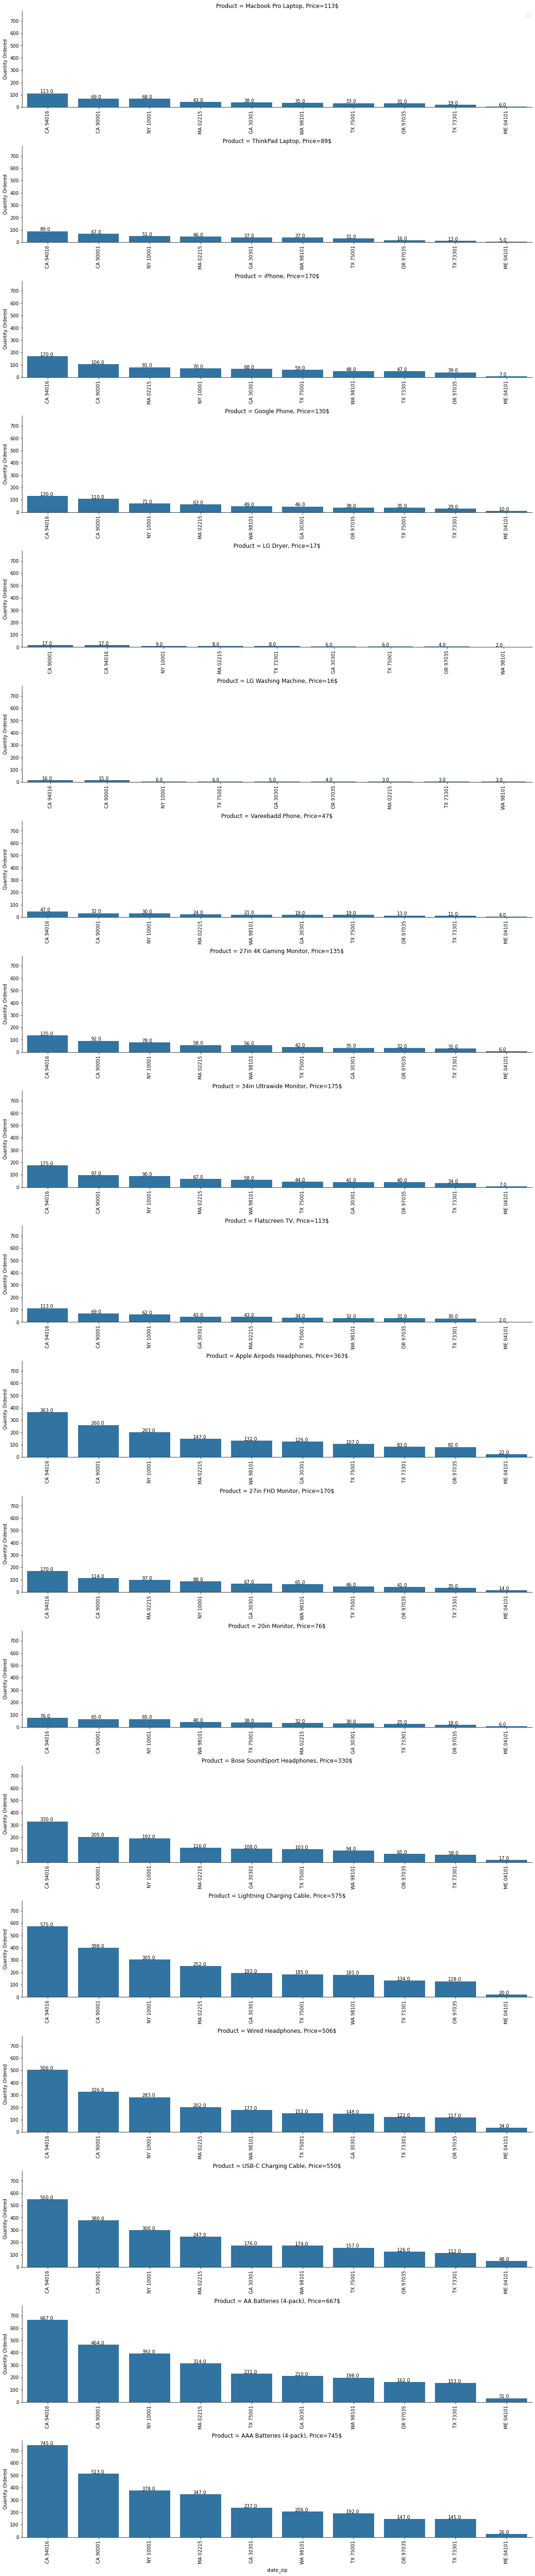

In [37]:
g = sns.FacetGrid(df, col="Product", height=4,aspect=4,
                  col_wrap=1, sharex=False, legend_out=False,gridspec_kws={"vspace":2})
l1 = []
for i in df['Product'].unique():
    m = df[df['Product'] == i]
    max1 = m['Quantity Ordered'].max()
    l1.append(max1)

g.map(sns.barplot, 'state_zip', 'Quantity Ordered').add_legend()

plt.subplots_adjust(hspace=0.4, wspace=2)
for axes, i in zip(g.axes.flat,  l1):
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    m = axes.set_title(axes.get_title()+", Price="+str(i)+"$")
   
    for p in axes.patches:
        point=p.xy
        
        height = p.get_height()
        width=p.get_width()
        n=axes.text(width+point[0]-(width/2+0.15),height+1.2,height)



plt.show()

**Reason**: CA(Californiya) is richest state of USA so maximum oredered from this state AND is far state from this shop office
            or maybe poor state 

- which things price is maximum with which state  those  sold maximum ?

In [38]:
df=sales_april_clean.copy()
df=df.groupby(['Product','city'],as_index=False).agg({'Price Each':max,'Quantity Ordered':sum})

df=df.sort_values(by=['Price Each','Quantity Ordered'],ascending=False)
df.head(150)

Product            city  Price Each  Quantity Ordered
124          Macbook Pro Laptop   San Francisco     1700.00               113
121          Macbook Pro Laptop     Los Angeles     1700.00                69
122          Macbook Pro Laptop   New York City     1700.00                68
119          Macbook Pro Laptop          Boston     1700.00                43
117          Macbook Pro Laptop         Atlanta     1700.00                38
123          Macbook Pro Laptop        Portland     1700.00                37
125          Macbook Pro Laptop         Seattle     1700.00                35
120          Macbook Pro Laptop          Dallas     1700.00                33
118          Macbook Pro Laptop          Austin     1700.00                19
133             ThinkPad Laptop   San Francisco      999.99                89
130             ThinkPad Laptop     Los Angeles      999.99                67
131             ThinkPad Laptop   New York City      999.99                51
128             ThinkPad Laptop          Boston      999.99                46
126             ThinkPad Laptop         Atlanta      999.99                37
134             ThinkPad Laptop         Seattle      999.99                37
129             ThinkPad Laptop          Dallas      999.99                31
132             ThinkPad Laptop        Portland      999.99                21
127             ThinkPad Laptop          Austin      999.99                13
169                      iPhone   San Francisco      700.00               170
166                      iPhone     Los Angeles      700.00               106
164                      iPhone          Boston      700.00                81
167                      iPhone   New York City      700.00                70
162                      iPhone         Atlanta      700.00                68
165                      iPhone          Dallas      700.00                59
170                      iPhone         Seattle      700.00                48
163                      iPhone          Austin      700.00                47
168                      iPhone        Portland      700.00                46
88                 Google Phone   San Francisco      600.00               130
85                 Google Phone     Los Angeles      600.00               110
86                 Google Phone   New York City      600.00                71
83                 Google Phone          Boston      600.00                63
89                 Google Phone         Seattle      600.00                49
87                 Google Phone        Portland      600.00                48
81                 Google Phone         Atlanta      600.00                46
84                 Google Phone          Dallas      600.00                35
82                 Google Phone          Austin      600.00                29
94                     LG Dryer     Los Angeles      600.00                17
97                     LG Dryer   San Francisco      600.00                17
106          LG Washing Machine   San Francisco      600.00                16
103          LG Washing Machine     Los Angeles      600.00                15
95                     LG Dryer   New York City      600.00                 9
91                     LG Dryer          Austin      600.00                 8
92                     LG Dryer          Boston      600.00                 8
90                     LG Dryer         Atlanta      600.00                 6
93                     LG Dryer          Dallas      600.00                 6
102          LG Washing Machine          Dallas      600.00                 6
104          LG Washing Machine   New York City      600.00                 6
99           LG Washing Machine         Atlanta      600.00                 5
96                     LG Dryer        Portland      600.00                 4
105          LG Washing Machine        Portland      600.00                 4
100          LG Washing Machine          Austi

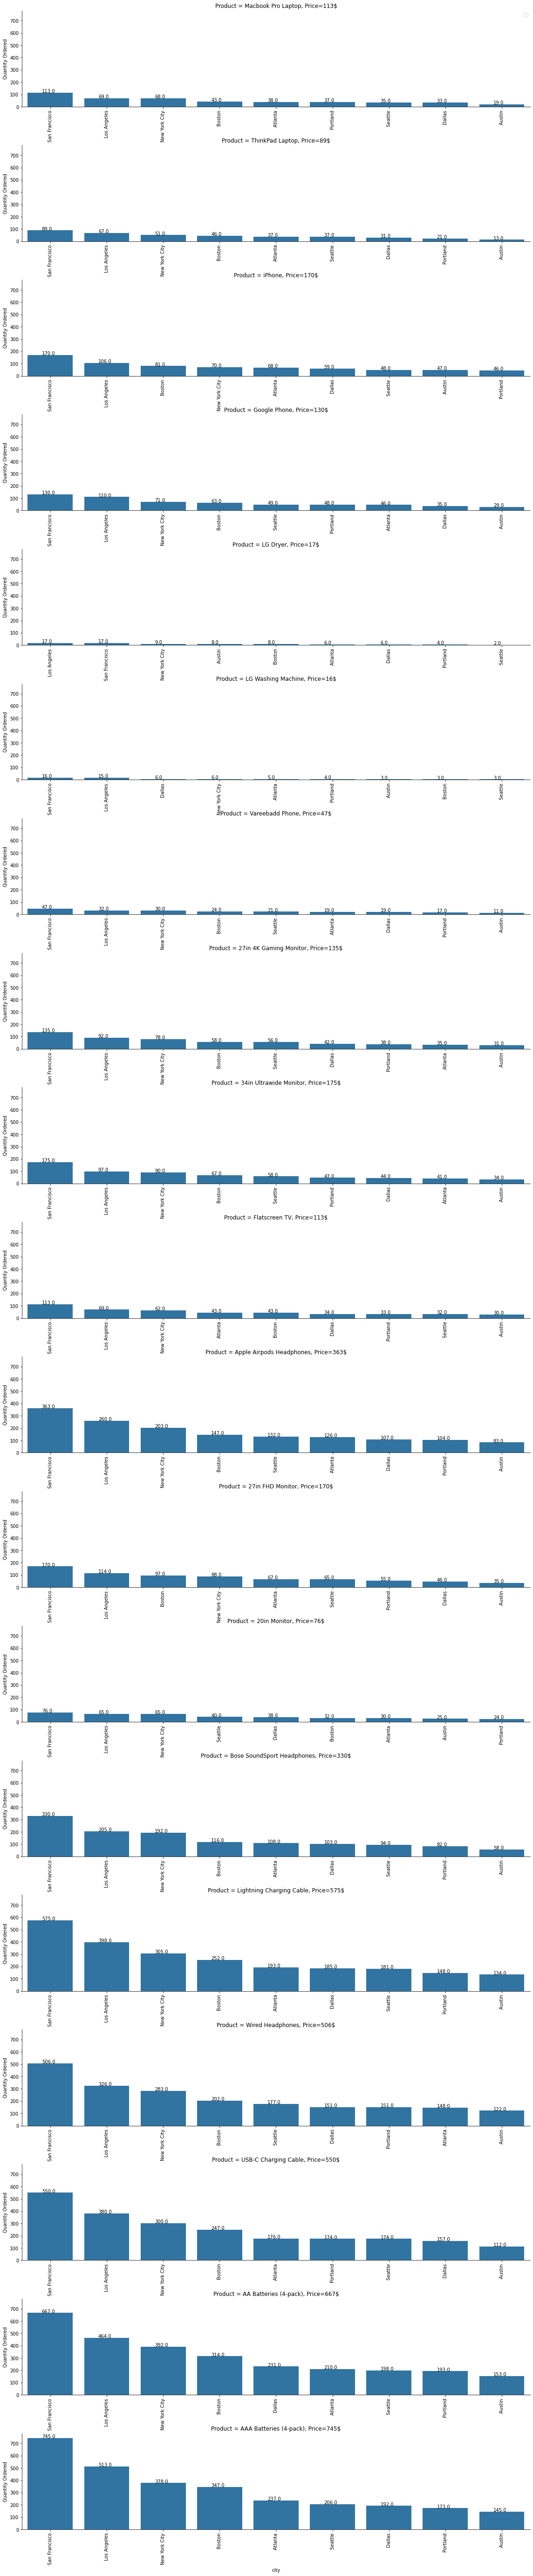

In [39]:
g = sns.FacetGrid(df, col="Product", height=4,aspect=4,
                  col_wrap=1, sharex=False, legend_out=False,gridspec_kws={"vspace":2})
l1 = []
for i in df['Product'].unique():
    m = df[df['Product'] == i]
    max1 = m['Quantity Ordered'].max()
    l1.append(max1)

g.map(sns.barplot, 'city', 'Quantity Ordered').add_legend()

plt.subplots_adjust(hspace=0.4, wspace=2)
for axes, i in zip(g.axes.flat,  l1):
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    m = axes.set_title(axes.get_title()+", Price="+str(i)+"$")
   
    for p in axes.patches:
        point=p.xy
        
        height = p.get_height()
        width=p.get_width()
        n=axes.text(width+point[0]-(width/2+0.15),height+1.2,height)



plt.show()

**Reason** : (San Francisco,Los Angeless) is the city of california and  i don't know about austin 

- time vs Price Each scatter plot what's pattern? 

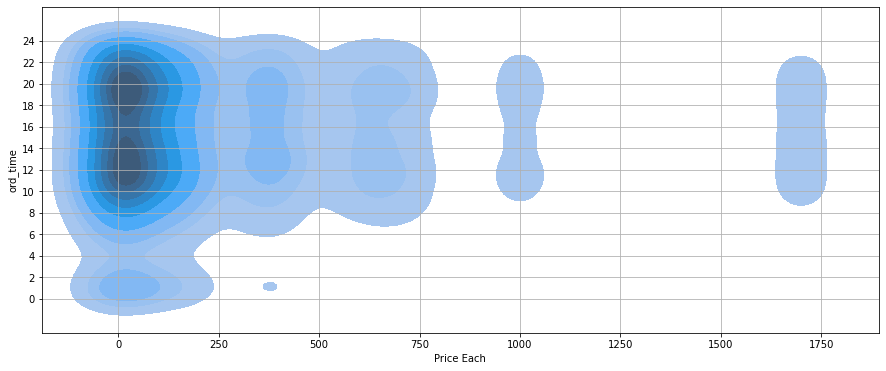

In [40]:

plt.figure(figsize=(15,6))
df=sales_april_clean.copy()
sns.kdeplot('Price Each','ord_time',data=df,fill=True)
y=[]
for i in range(0,25,2):
    
    y.append(i)
plt.yscale("linear")
plt.yticks(y)
plt.grid()
plt.show()

**Conclusion** :above plot tell us 1750 price things like laptop ,phone and all higher price things sold time between 9 am to 21 pm so here if we want to  give some offer by this shop then we can published this offer between 9am to 21pm.

<Figure size 1080x576 with 0 Axes>

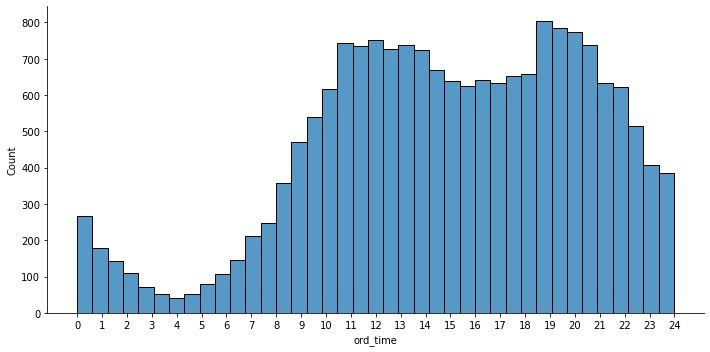

In [41]:
plt.figure(figsize=(15,8))
sns.displot(sales_april_clean['ord_time'],height=5,aspect=2)
y=[]

for i in range(0,25,1):
    
    y.append(i)
plt.yscale("linear")
plt.xticks(y)
plt.show()



**Conclusion**: Above graph tell us our selling overall quantity  important things is when we are give leave our employee in a day?  0 am to 10 am,14pm to 18 pm and 21 pm to 24 pm.

In [42]:
df=sales_april_clean.groupby('Product',as_index=False).agg({'Price Each':sum}).sort_values(by='Price Each',ascending=False)

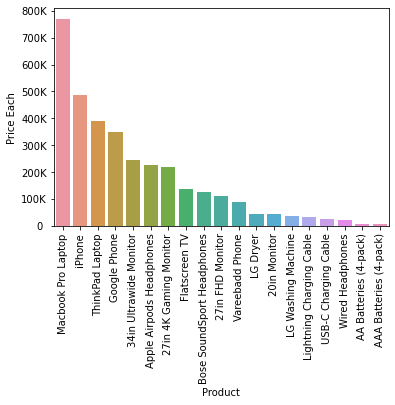

In [43]:
from math import log10, floor
ax=sns.barplot(data=df,x='Product',y='Price Each')
plt.xticks(rotation=90)
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.show()

In [44]:
sales_april_clean['Quantity Ordered'].value_counts()


1    16558
2     1328
3      299
4       72
5       24
6        7
7        1
Name: Quantity Ordered, dtype: int64

In [45]:
sales_april_clean['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)